In [52]:
import pygmt ,os
import pandas as pd

In [69]:
pygmt.config(FONT_ANNOT_PRIMARY = '10p,Times-Roman',
            FONT_LABEL = '8',
            MAP_LABEL_OFFSET = '4p',
            MAP_TICK_LENGTH_PRIMARY = '5p',
            PROJ_LENGTH_UNIT = 'c',
            MAP_ANNOT_OFFSET_PRIMARY = '5p',
            MAP_ANNOT_OFFSET_SECONDARY = '5p',
            MAP_FRAME_TYPE = 'fancy',
            MAP_FRAME_WIDTH = 'auto',
            FORMAT_GEO_MAP = 'D',
            PS_CHAR_ENCODING = 'Standard+',
            MAP_FRAME_PEN = '2p,black')

def PygmtBegin(figmap, region, title, grd):
    figmap.basemap(region=region, projection="M15c", frame = ['x1f0.5', 'y1f0.5', f'nSeW+t"{title}"'])
    pygmt.makecpt(cmap='polar', reverse=True, series=[-5,5,0.5], continuous=True, output='colorbar.cpt')
    figmap.grdimage(grid=grd, region=region, cmap='colorbar.cpt', transparency=50)
    figmap.coast(resolution = 'h', shorelines ='1/thinnest,black', water='white', borders = '1/0.25p')
    figmap.grdcontour(grid=grd, interval=1, annotation=2)
    figmap.colorbar( cmap ='colorbar.cpt', frame=['a1f0.5','+L"dVp (%)"'] )

In [107]:
fn = '/Volumes/home/Research/DataBase/18.ANA2_P_2018.tomo.txt'
df = pd.read_csv(fn)
depth = 410

In [108]:
set(df['dep'])

{60.0,
 95.0,
 130.0,
 165.0,
 200.0,
 240.0,
 280.0,
 320.0,
 365.0,
 410.0,
 455.0,
 505.0,
 555.0,
 605.0,
 660.0,
 715.0,
 775.0,
 835.0,
 895.0,
 940.0,
 1010.0}

In [109]:
dff = df[df['dep']==depth]
print(dff)

             lat        lon    dep      %dVp   hq
35100  48.351873   7.128805  410.0  0.000000  0.0
35101  47.781895   7.396367  410.0  0.000000  0.0
35102  47.210086   7.658676  410.0 -0.000000  0.0
35103  46.636527   7.915902  410.0 -0.000001  0.0
35104  46.061299   8.168209  410.0 -0.000001  0.0
...          ...        ...    ...       ...  ...
38995  26.634184  54.260823  410.0 -0.000000  0.0
38996  26.048049  54.119913  410.0 -0.000000  0.0
38997  25.462983  53.980690  410.0  0.000001  0.0
38998  24.879053  53.843112  410.0  0.000001  0.0
38999  24.296324  53.707136  410.0  0.000001  0.0

[3900 rows x 5 columns]


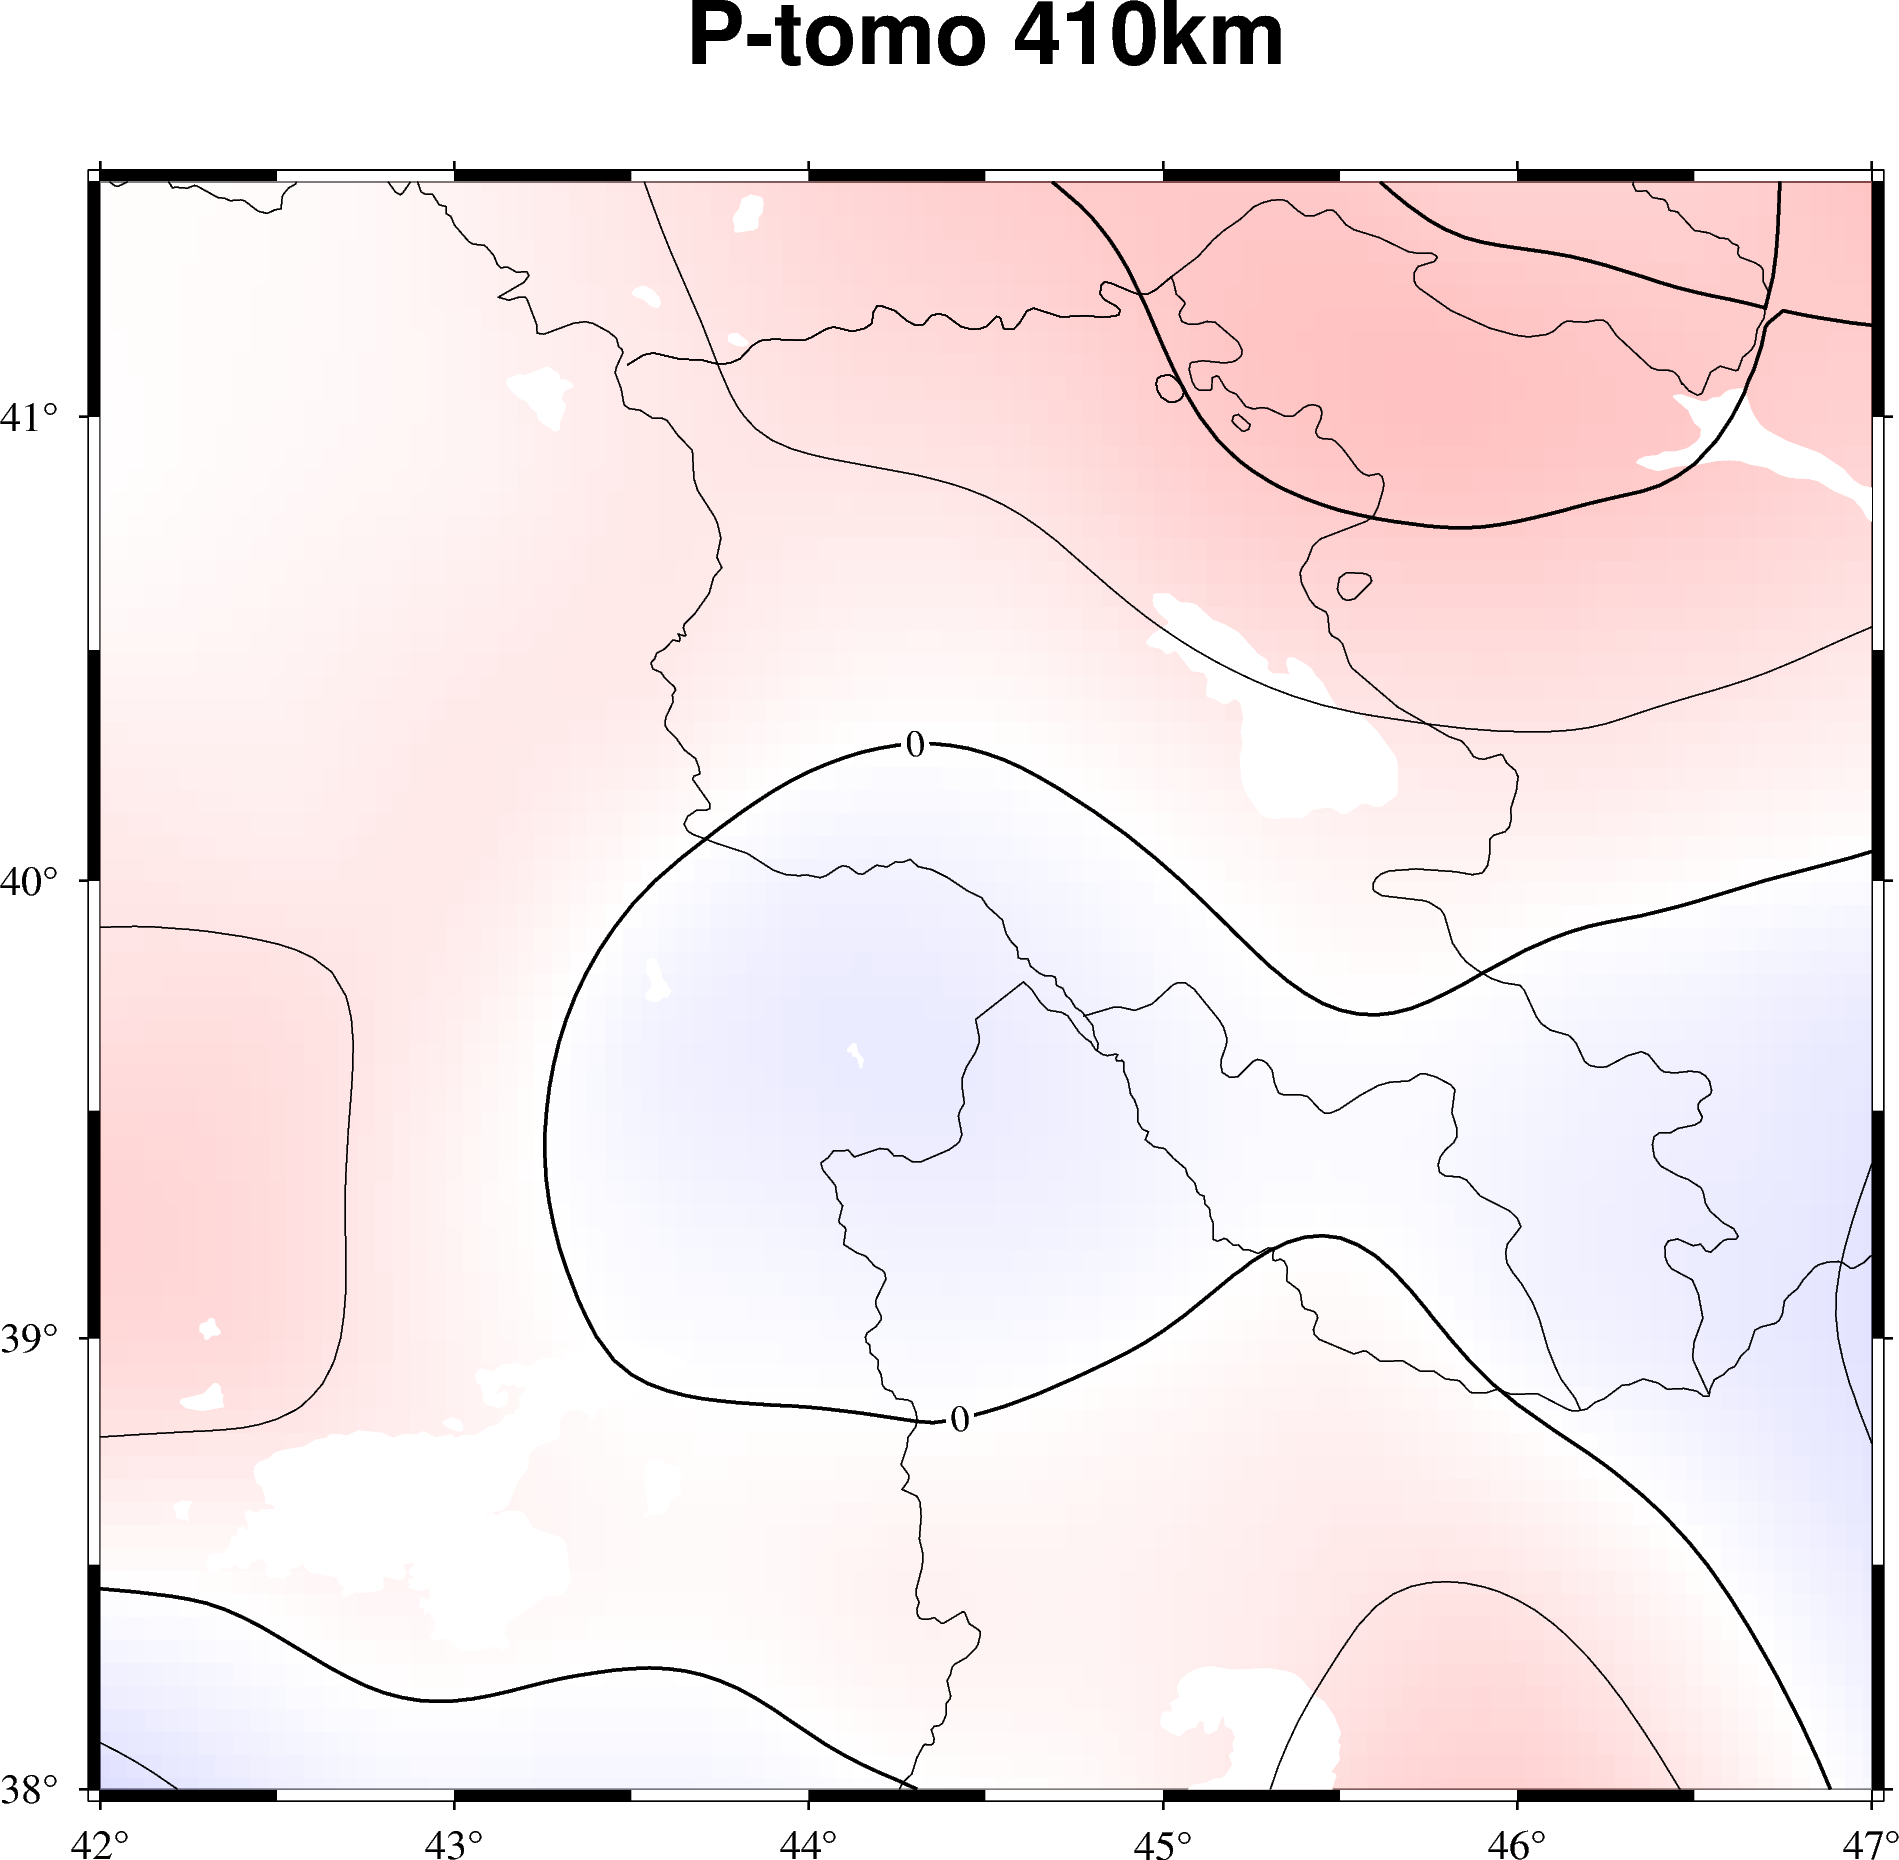

In [110]:
region =[42, 47, 38, 41.5]  #original
figmap = pygmt.Figure()
title = f"P-tomo {depth}km"
figmap.basemap(region=region, projection="M15c", frame = ['x1f0.5', 'y1f0.5', f'nSeW+t"{title}"'])
grid = pygmt.surface(x=dff['lon'],y=dff['lat'],z=dff['%dVp']*100,spacing='0.05/0.05', region=region )
pygmt.makecpt(cmap='polar', reverse=True, series=[-5,5,0.5], continuous=True, output='colorbar.cpt')
figmap.grdimage(grid=grid, region=region, cmap='colorbar.cpt', transparency=50)
figmap.coast(resolution = 'h', shorelines ='1/thinnest,black', water='white', borders = '1/0.25p')
figmap.grdcontour(grid=grid, interval=1, annotation=2)
figmap.show()
figmap.savefig(f'{depth}.png',dpi=200)
figmap.savefig(f'{depth}.pdf')